## Домашняя работа. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: Target feature. Binary.	Income >50K, <=50K.

In [17]:
import pandas as pd
pd.__version__ # 1.4.1

'2.2.2'

In [18]:
columns='age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income'.split(',')
# df = pd.read_csv('data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [15]:
df[0:10]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,passive_income,passive_income_category,magic_salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,2174,8.0,14
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,1.0,14
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,1.0,14
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,1.0,14
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,1.0,14
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,0,1.0,14
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0,0,1.0,14
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,0,0,1.0,165
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,0,14084,10.0,165
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,0,5178,9.0,165


2) Сколько колонок и сколько строк в этом датасете?

In [16]:
print(f"Количество колонок: {df.shape[1]}")
print(f"Количество строк: {df.shape[0]}")

Количество колонок: 18
Количество строк: 32561


3) Какие типы данных у элементов этого датасета?

In [9]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


4) Какие признаки имеют пропуски?

In [10]:
missing_columns = df.columns[df.isnull().any()]

print(f"Столбцы с пропусками: {missing_columns}")

Столбцы с пропусками: Index([], dtype='object')


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ:

Как мне кажется, пропуски в данных могут быть  по нескольким причинам:
 1) Люди могут отказываться отвечать на некоторые вопросы, что приводит к отсутствию данных.
 2) Некоторые люди могут не иметь опыта или знаний, которые необходимы для ответа на определенный вопрос, что также может привести к пропуску.
 3) Ответ человека ни подходит ни под один из вариантов.
 4) Ошибки при формировании дата сета. Ошибки заполнения и прочее.


6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [11]:
print("Уникальные рабочие классы:",  df['workclass'].unique())
print("Количество уникальных рабочих классов:", df['workclass'].nunique())

Уникальные рабочие классы: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Количество уникальных рабочих классов: 9


7) Какой средний возраст женщин и мужчин?

In [12]:
df.groupby('sex')['age'].mean().round()

,age
sex,
Female,37.0
Male,39.0


8) Постройте гистограмму(bar) распределения образования людей (education)

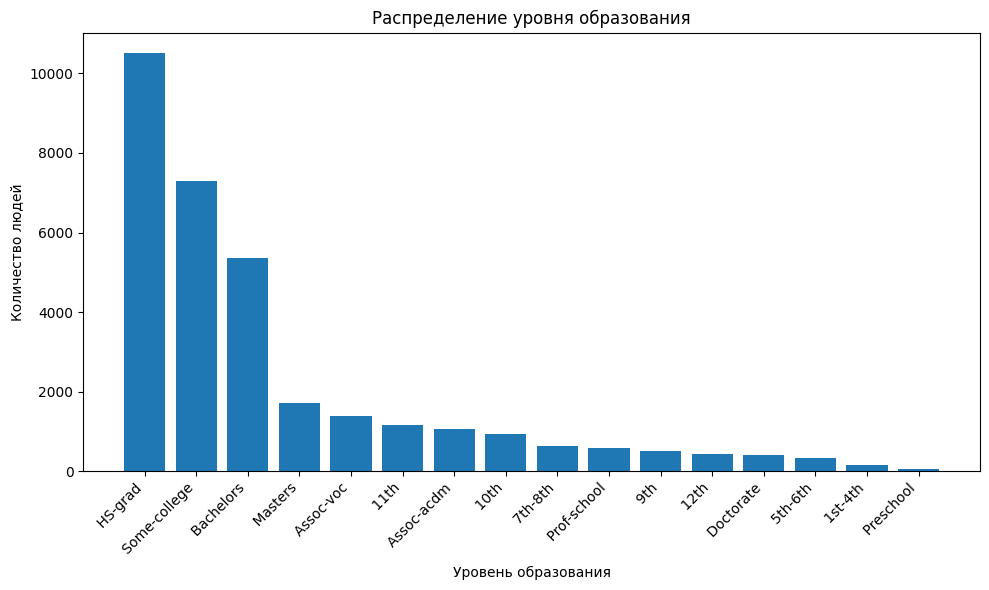

In [13]:
import matplotlib.pyplot as plt

education_counts = df['education'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Уровень образования')
plt.ylabel('Количество людей')
plt.title('Распределение уровня образования')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [14]:
high_income = df[df['income'].str.strip().str.lower() == '>50k']['age']
low_income = df[df['income'].str.strip().str.lower() == '<=50k']['age']

high_income_mean = high_income.mean()
high_income_std = high_income.std()
low_income_mean = low_income.mean()
low_income_std = low_income.std()

print(f"Средний возраст людей с доходом >50K: {high_income_mean:.2f}")
print(f"Среднеквадратичное отклонение возраста людей с доходом >50K: {high_income_std:.2f}")
print(f"\nСредний возраст людей с доходом <=50K: {low_income_mean:.2f}")
print(f"Среднеквадратичное отклонение возраста людей с доходом <=50K: {low_income_std:.2f}")

Средний возраст людей с доходом >50K: 44.25
Среднеквадратичное отклонение возраста людей с доходом >50K: 10.52

Средний возраст людей с доходом <=50K: 36.78
Среднеквадратичное отклонение возраста людей с доходом <=50K: 14.02


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [15]:
high_income = df[df['income'].str.strip().str.lower() == '>50k']

higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

no_higher_education_high_income = high_income[~high_income['education'].isin(higher_education)]

print(f"Количество людей с доходом >50k, но без высшего образования: {len(no_higher_education_high_income)}")

Количество людей с доходом >50k, но без высшего образования: 7841


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [16]:
men = df[df['sex'].str.strip() == 'Male']
print(f"men {len(men)}")

married_men = men[men['marital-status'].str.startswith(' Married')]
single_men = men[~men['marital-status'].str.startswith(' Married')]
print(f"single_men {len(single_men)}")
print(f"married_men {len(married_men)}")

if len(married_men) > 0:
  married_men_high_income_ratio = len(married_men[married_men['income'].str.strip().str.lower() == '>50k']) / len(married_men)
  print(f"Доля зарабатывающих >50k среди женатых мужчин: {married_men_high_income_ratio:.2%}")
else:
  print("В наборе данных нет женатых мужчин.")

if len(single_men) > 0:
  single_men_high_income_ratio = len(single_men[single_men['income'].str.strip().str.lower() == '>50k']) / len(single_men)
  print(f"Доля зарабатывающих >50k среди холостых мужчин: {single_men_high_income_ratio:.2%}")
else:
  print("В наборе данных нет холостых мужчин.")

men 21790
single_men 8249
married_men 13541
Доля зарабатывающих >50k среди женатых мужчин: 44.05%
Доля зарабатывающих >50k среди холостых мужчин: 8.45%


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [12]:
df['income'] = (df['income'] == '>50K').astype(int)
average_hours = df.groupby(['native-country', 'income'])['hours-per-week'].mean().round()
average_hours

,,hours-per-week
native-country,income,
?,0,42.0
Cambodia,0,41.0
Canada,0,40.0
China,0,38.0
Columbia,0,39.0
Cuba,0,39.0
Dominican-Republic,0,42.0
Ecuador,0,40.0
El-Salvador,0,37.0


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [19]:
import numpy as np
df['passive_income'] = df['capital-gain'] - df['capital-loss']
df['passive_income_category'] = np.round(np.log1p(df['passive_income'] + 1))

pivot_table = pd.pivot_table(df, values='passive_income_category', index='education', aggfunc=['count'])
pivot_table

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,count
,passive_income_category
education,
10th,905
11th,1142
12th,425
1st-4th,164
5th-6th,322
7th-8th,623
9th,505
Assoc-acdm,1012


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [20]:
women = df[df['sex'].str.strip() == 'Female']

high_income_women = women[women['income'].str.strip().str.lower() == '>50k']

country_counts = high_income_women.groupby('native-country').size()

sorted_counts = country_counts.sort_values(ascending=False)

print("Страны с наибольшим количеством женщин, зарабатывающих >50K:")
print(sorted_counts)

Страны с наибольшим количеством женщин, зарабатывающих >50K:
native-country
United-States         1072
?                       17
Philippines             12
Canada                   9
Germany                  7
England                  6
Japan                    5
Italy                    5
China                    5
Taiwan                   4
France                   3
South                    3
Cuba                     3
Dominican-Republic       2
Puerto-Rico              2
Portugal                 2
Poland                   2
Mexico                   2
Iran                     2
India                    2
Jamaica                  1
El-Salvador              1
Laos                     1
Greece                   1
Nicaragua                1
Ireland                  1
Hungary                  1
Scotland                 1
Hong                     1
Honduras                 1
Thailand                 1
Haiti                    1
Vietnam                  1
Yugoslavia               1
dtype:

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [21]:
df['magic_salary'] = np.where(df['income'] == ' <=50K', np.random.randint(0, 51), np.random.randint(51, 201))

average_hourly_salary = df.groupby('education')['magic_salary'].mean() / df.groupby('education')['hours-per-week'].mean()
average_hourly_salary

,0
education,
10th,1.220798
11th,1.263452
12th,1.306203
1st-4th,1.058659
5th-6th,1.090018
7th-8th,1.131296
9th,1.132600
Assoc-acdm,1.808390
Assoc-voc,1.807881
